# Course End Project 1 : Employee Turnover Analytics

**Project Statement:**

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.
Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.
As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.	Perform data quality check by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance.
6.	Identify the best model and justify the evaluation metrics used.
7.	Suggest various retention strategies for targeted employees.

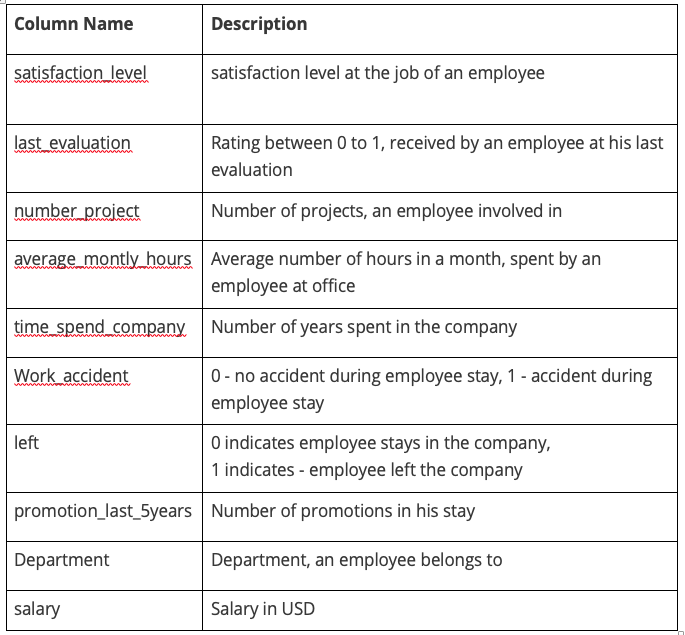

**Import the required Python libraries**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

**Upload the dataset and name it 'df'**

In [29]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')

#1. Perform a data quality check

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**1.1 Check the missing values if any**

In [31]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


**Observation**:
No missing values in the dataset.

#2. Exploratory Data Analysis

Factors Contributing to Employee Turnover

**2.1 Heatmap of the Correlation Matrix**




<ipython-input-32-7645207d6847>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


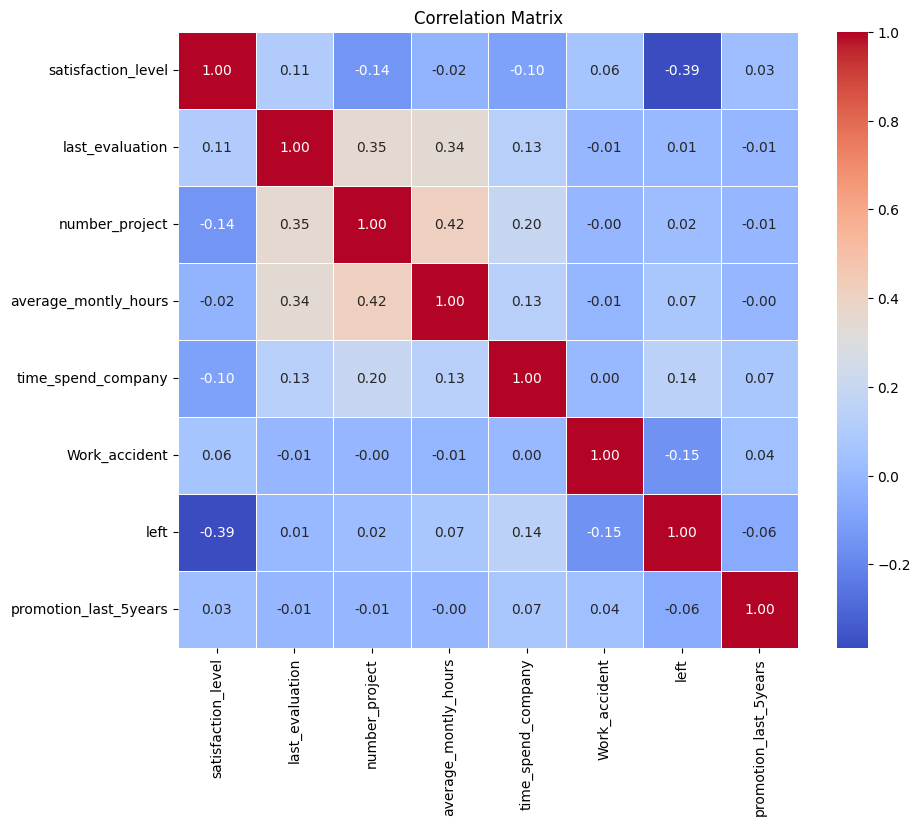

In [32]:
correlation_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Observation:**

*   Some degree of positive correlation found between variables 'number_project' & ' average_monthly-hours'
*   Prominent Negative correlation found between variables 'left' & 'satisfaction_level'

*   Significant negative correlation between 'left' and 'satisfaction_level'





**2.2 Distribution Plots**

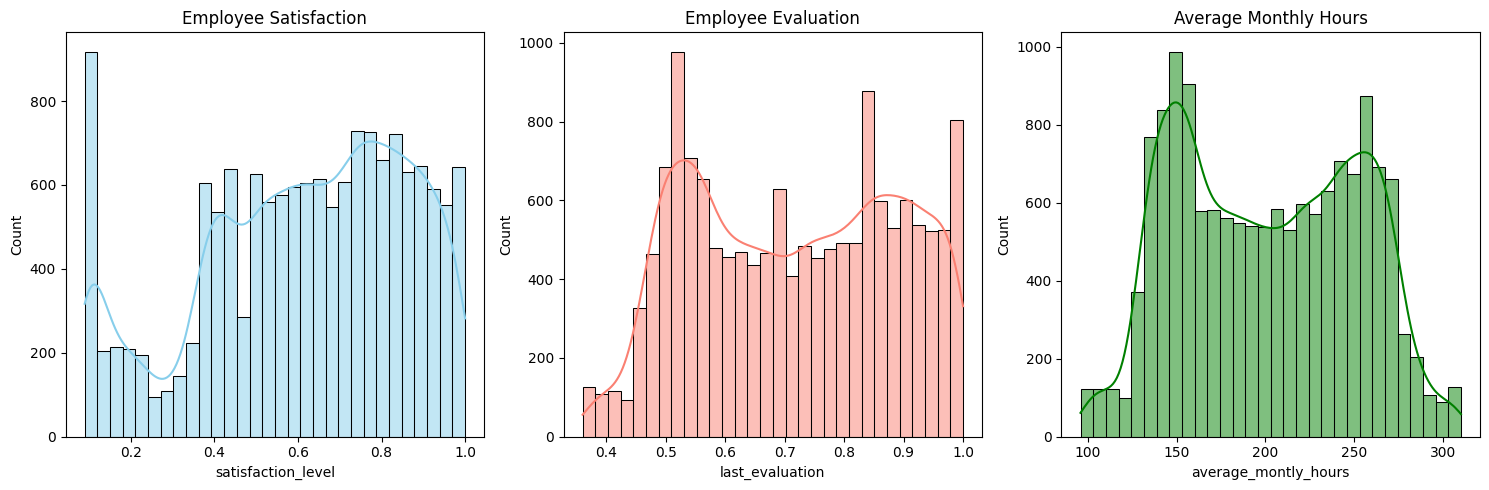

In [33]:

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['satisfaction_level'], bins=30, kde=True, color='skyblue')
plt.title('Employee Satisfaction')

plt.subplot(1, 3, 2)
sns.histplot(df['last_evaluation'], bins=30, kde=True, color='salmon')
plt.title('Employee Evaluation')

plt.subplot(1, 3, 3)
sns.histplot(df['average_montly_hours'], bins=30, kde=True, color='green')
plt.title('Average Monthly Hours')

plt.tight_layout()
plt.show()


**Observations:**

Employee Satisfaction:

- The first plot shows the distribution of the satisfaction_level variable.
- The staisfaction level is spread out with very high count of employee with no satisfaction level.
- The KDE (Kernel Density Estimate) shows concentration of satisfaction_level between 0.5 and 1.0
- The majority of employees seem to have satisfaction levels around the middle range, with a slight peak indicating a higher density of employees with relatively high satisfaction.

Employee Evaluation:

The distribution of employee evaluations appears relatively balanced, with a peak around the middle values. There might be clusters of employees with different performance levels.

Average Monthly Hours:

The distribution of average monthly hours shows two distinct peaks, suggesting the possible existence of two groups of employees with different work hour patterns.


**2.3 Bar Plot of Employee Project Count:**

Bar Plot of Employee Project Count of both employees who left and who stayed in the organisation.

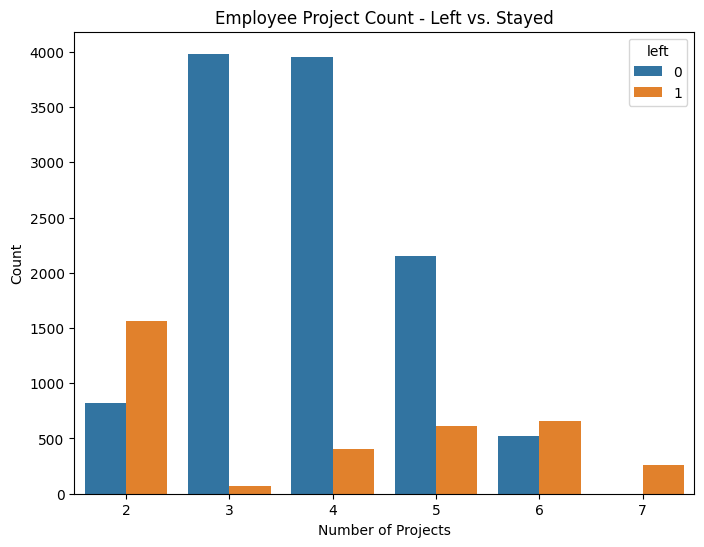

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Employee Project Count - Left vs. Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()


**Observations:**




*   Employees with fewer projects (e.g., 2 or 3) seem to have a higher likelihood of leaving the organization.
*   Employees with more projects (e.g., 4, 5 or 6) are relatively more likely to stay.

**Remark:**The organization might need to analyze why employees with fewer projects are leaving and consider strategies to retain them. This could include workload balancing, recognizing and rewarding high-performing employees, or addressing potential dissatisfaction.

#3. Clustering

Perform clustering of employees who left based on their satisfaction and evaluation.

3.1 Choose columns satisfaction_level, last_evaluation and left.

In [35]:
from sklearn.cluster import KMeans

# Select relevant columns for clustering
selected_columns = ['satisfaction_level', 'last_evaluation', 'left']
left_employees_df = df[df['left'] == 1][selected_columns]

# Drop the 'left' column as it's not needed for clustering
left_employees_df = left_employees_df.drop('left', axis=1)

3.2 Do KMeans clustering of employees who left the company into 3 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


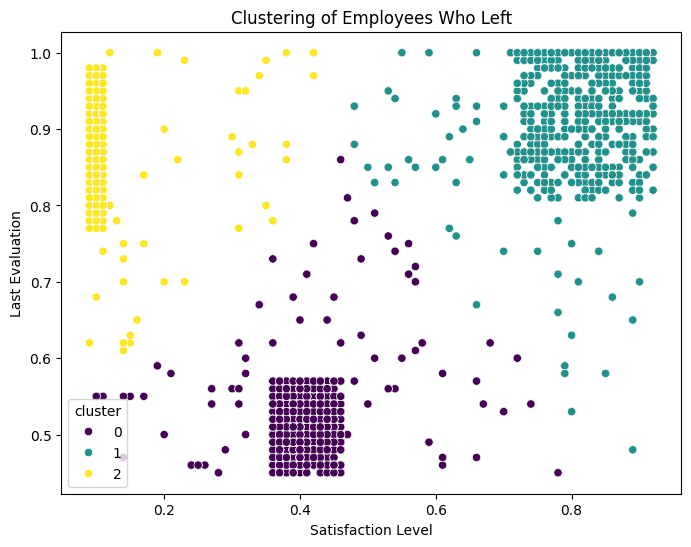

In [36]:
# Perform KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees_df['cluster'] = kmeans.fit_predict(left_employees_df)


#Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees_df, palette='viridis')
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()

**Observation:**
- We select the relevant columns ('satisfaction_level', 'last_evaluation', and 'left') for clustering.
- We filter the DataFrame to include only employees who left (i.e., 'left' column is 1).
- We drop the 'left' column as it's not needed for clustering.
- We perform KMeans clustering with 3 clusters on the selected features.
- We visualize the clusters using a scatter plot with satisfaction level on the x-axis, last evaluation on the y-axis.


**3.3 Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.**

**Thoughts on Employee Clusters:**


Cluster 0: Employees with relatively low satisfaction levels and low evaluations.

Cluster 1: Employees with moderate satisfaction levels and high evaluations.

Cluster 2: Employees with high satisfaction levels and high evaluations.

- These clusters can help in understanding the different groups of employees who left based on their satisfaction and evaluation.
- It provides insights into the potential reasons for turnover and can guide targeted retention strategies for each cluster. For example, addressing **dissatisfaction in Cluster 0**, **recognizing and retaining high performers in Cluster 1, and maintaining the positive environment for satisfied employees in Cluster 2.**

#4. Handle the left Class Imbalance using SMOTE technique.

**4.1	Pre-Process the data by converting categorical columns to numerical columns by**


■	Separating categorical variables and numeric variables.


■	Applying get_dummies() to the categorical variables.


■	Combining categorical variables and numeric variables.


In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# Step 1: Separate categorical and numeric variables
categorical_columns = ['sales', 'salary']
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

# Step 2: Apply get_dummies to categorical variables
categorical_data = pd.get_dummies(df[categorical_columns])

# Step 3: Combine categorical and numeric variables
processed_data = pd.concat([categorical_data, df[numeric_columns]], axis=1)



In [38]:
# Separate features and target variable
X = processed_data
y = df['left']

In [39]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Step 5: Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [41]:
# Step 6: Optionally, apply StandardScaler to scale the features
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)


**In this code:**


- pd.get_dummies is used to one-hot encode the categorical variables.

- pd.concat is used to combine the one-hot encoded categorical variables with the numeric variables.

- The data is split into features (X) and the target variable (y).
train_test_split is used to split the data into training and testing sets.

- SMOTE is applied to the training set to handle class imbalance.

- Optionally, StandardScaler is used to scale the features, which can be important for some machine learning algorithms.

- Now, we can use X_resampled_scaled and y_resampled for training your machine learning model.

**4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.**

In [42]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled_scaled and y_resampled are the features and target variable after SMOTE and scaling

# Stratified split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=123)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (14614, 20)
X_test shape: (3654, 20)
y_train shape: (14614,)
y_test shape: (3654,)


**4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.**

In [43]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are the training features and target variable

# Instantiate SMOTE
smote = SMOTE(random_state=123)

# Upsample the training dataset using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the shape of the resampled training set
print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)


X_train_resampled shape: (14614, 20)
y_train_resampled shape: (14614,)


#5.	Perform 5-Fold cross-validation model training and evaluate performance.

**5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.**


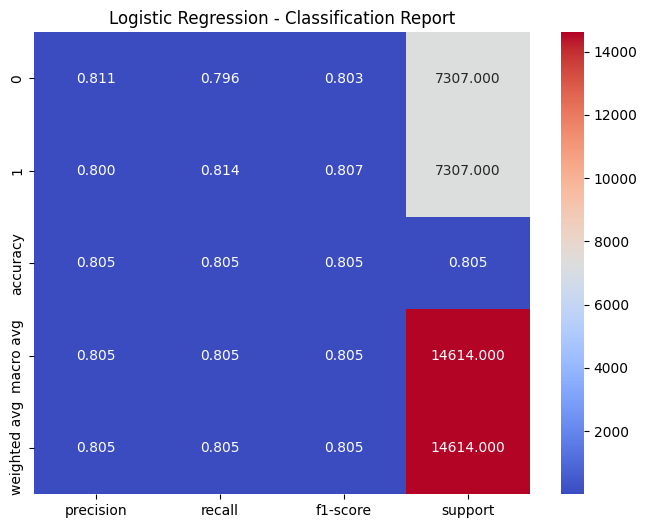

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report

# Instantiate Logistic Regression model
model = LogisticRegression(random_state=123)

# Instantiate StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform 5-fold cross-validation
y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=cv, method='predict_proba')

# Convert predicted probabilities to predicted labels (0 or 1)
y_pred_labels = (y_pred[:, 1] > 0.5).astype(int)

# Plot the Classification Report
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.DataFrame(classification_report(y_train_resampled, y_pred_labels, output_dict=True)).T,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
)
plt.title('Logistic Regression - Classification Report')
plt.show()


**Observation:**

- The classification report provides evidence that the Logistic Regression model is performing well in predicting both classes.
- The model shows good precision and recall for both the "Stayed" and "Left" classes, suggesting a balanced performance.
- The F1-score provides an overall measure of model performance, considering both false positives and false negatives.
- It's essential to consider the specific goals and requirements of the organization when interpreting these metrics.
- Adjustments to the classification threshold might be made based on the organization's priorities.

**5.2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.**

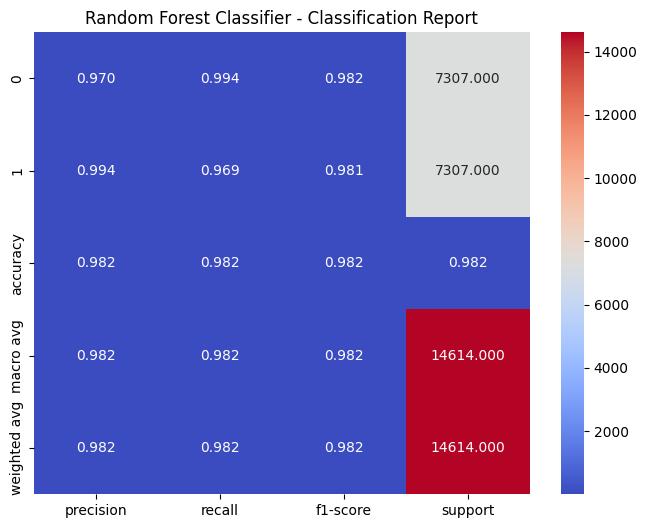

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report

# Instantiate Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=123)

# Instantiate StratifiedKFold for cross-validation
cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform 5-fold cross-validation
y_pred_rf = cross_val_predict(model_rf, X_train_resampled, y_train_resampled, cv=cv_rf, method='predict_proba')

# Convert predicted probabilities to predicted labels (0 or 1)
y_pred_labels_rf = (y_pred_rf[:, 1] > 0.5).astype(int)

# Plot the Classification Report
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.DataFrame(classification_report(y_train_resampled, y_pred_labels_rf, output_dict=True)).T,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
)
plt.title('Random Forest Classifier - Classification Report')
plt.show()


**Observation:**

-The Random Forest Classifier model demonstrates strong performance in predicting both classes.
- High precision and recall for both "Stayed" and "Left" classes indicate a balanced and accurate model.
- The F1-score provides an overall measure of model performance, considering both false positives and false negatives.
- Support values indicate the number of observations in each class, providing context for the metrics.
- The Random Forest Classifier appears to be effective in predicting employee turnover, providing a good balance between precision and recall.


**5.3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.**

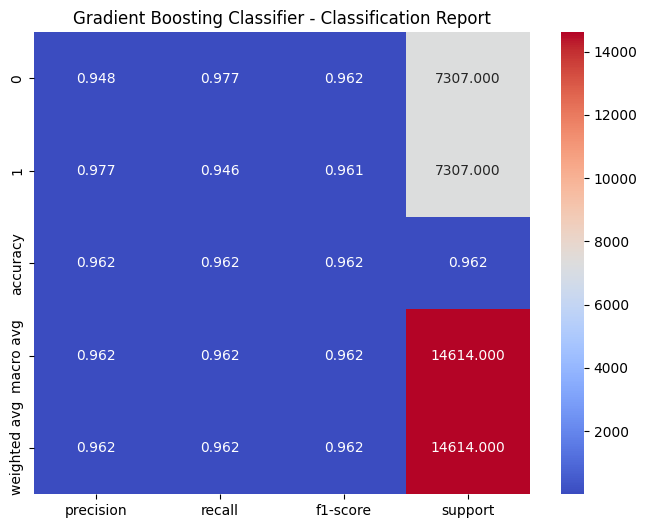

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report


# Instantiate Gradient Boosting Classifier model
model_gb = GradientBoostingClassifier(random_state=123)

# Instantiate StratifiedKFold for cross-validation
cv_gb = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Perform 5-fold cross-validation
y_pred_gb = cross_val_predict(model_gb, X_train_resampled, y_train_resampled, cv=cv_gb, method='predict_proba')

# Convert predicted probabilities to predicted labels (0 or 1)
y_pred_labels_gb = (y_pred_gb[:, 1] > 0.5).astype(int)

# Plot the Classification Report
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.DataFrame(classification_report(y_train_resampled, y_pred_labels_gb, output_dict=True)).T,
    annot=True,
    cmap='coolwarm',
    fmt=".3f",
)
plt.title('Gradient Boosting Classifier - Classification Report')
plt.show()


**Observation:**

- The Gradient Boosting Classifier model demonstrates strong performance in predicting both classes.
- High precision and recall for both "Stayed" and "Left" classes indicate a balanced and accurate model.
- The F1-score provides an overall measure of model performance, considering both false positives and false negatives.
- Support values indicate the number of observations in each class, providing context for the metrics.
- The Gradient Boosting Classifier appears to be effective in predicting employee turnover, providing a good balance between precision and recall.



#6.	Identify the best model and justify the evaluation metrics used.



**6.1.	Find the ROC/AUC for each model and plot the ROC curve.**

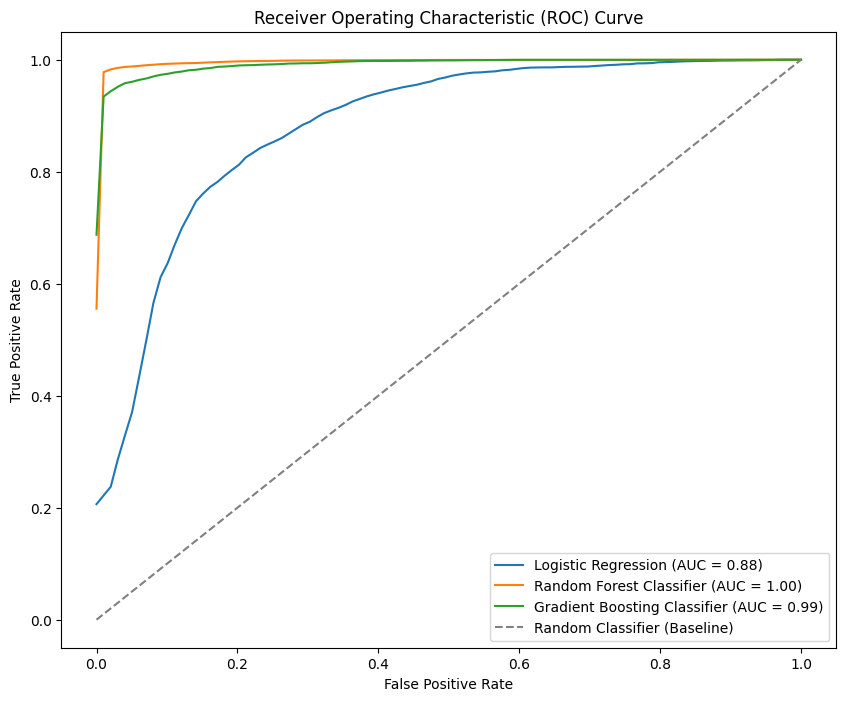

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming X_train_resampled and y_train_resampled are the upsampled training features and target variable

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=123),
    'Random Forest Classifier': RandomForestClassifier(random_state=123),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=123)
}

# Instantiate StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

for name, model in models.items():
    tpr_list = []
    mean_fpr = np.linspace(0, 1, 100)

    # Perform 5-fold cross-validation
    for train_idx, test_idx in cv.split(X_train_resampled, y_train_resampled):
        X_train_cv, X_test_cv = X_train_resampled[train_idx], X_train_resampled[test_idx]
        y_train_cv, y_test_cv = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[test_idx]

        # Fit the model
        model.fit(X_train_cv, y_train_cv)

        # Get predicted probabilities
        y_prob = model.predict_proba(X_test_cv)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test_cv, y_prob)
        tpr_list.append(np.interp(mean_fpr, fpr, tpr))

    # Compute mean TPR
    mean_tpr = np.mean(tpr_list, axis=0)

    # Compute AUC
    auc_score = auc(mean_fpr, mean_tpr)

    # Plot ROC curve
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot ROC curve for random classifier (baseline)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Classifier (Baseline)')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


- This code performs 5-fold cross-validation for each model, computes ROC curves, and calculates the AUC score for each. The ROC curves are then plotted together on a single graph for comparison. The AUC score provides a measure of how well the model distinguishes between positive and negative instances.

- You can identify the model with the highest AUC score as the one that performs the best in terms of ROC/AUC. Higher AUC indicates better discrimination between the classes. The ROC curve visually represents the trade-off between sensitivity (true positive rate) and specificity (true negative rate) for different thresholds.

- Evaluate other metrics such as precision, recall, and F1-score based on your specific business requirements and the importance of false positives and false negatives in your context. The choice of the best model might depend on the balance between these metrics and the specific goals of your project.

**Observations from the ROC curve and AUC scores can provide insights into the performance of the models. Here are some observations you can make:**

**Separation of Classes:**
A model with a higher AUC score indicates better separation between positive and negative classes. The Random Forest and Gradient Boosting classifiers have a better score.

**Model Comparison:**
Compare the AUC scores for each model. A higher AUC generally suggests better model performance. in terms of discrimination, random Forest and Gradient Boosting Classifier are very close.

**Trade-off between Sensitivity and Specificity:**
ROC curves visualize the trade-off between sensitivity (true positive rate) and specificity (true negative rate) at different probability thresholds. Models that have curves closer to the top-left corner provide a better balance between sensitivity and specificity. Random Forest Classifier seems to make the cut here.

**AUC Interpretation:**
AUC values can be interpreted as the probability that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance. An AUC of 0.5 suggests no discrimination (random classifier), while an AUC of 1.0 represents perfect discrimination. Random Forest Classifier has a AUC of 1.0

When you generated ROC curves for multiple models, compare their AUC scores and shapes. A model with a higher AUC and a curve closer to the top-left corner generally performs better.

**6.2.	Find the confusion matrix for each of the models.**

In [48]:
from sklearn.model_selection import train_test_split

# Assuming your original data is df
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('left', axis=1), df['left'], test_size=0.2, random_state=123
)

print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in y_test:", len(y_test))


Number of samples in X_test: 3000
Number of samples in y_test: 3000


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Assuming you have already defined and trained the models
model_lr = LogisticRegression(random_state=123)
model_rf = RandomForestClassifier(random_state=123)
model_gb = GradientBoostingClassifier(random_state=123)

# Train the models on the training data (X_train_resampled, y_train_resampled)
model_lr.fit(X_train_resampled, y_train_resampled)
model_rf.fit(X_train_resampled, y_train_resampled)
model_gb.fit(X_train_resampled, y_train_resampled)

# Assuming X_test_scaled is your preprocessed test data

# Predictions on the test set for each model
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_gb = model_gb.predict(X_test_scaled)

# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# Confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest Classifier:")
print(cm_rf)

# Confusion matrix for Gradient Boosting Classifier
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix for Gradient Boosting Classifier:")
print(cm_gb)




Confusion Matrix for Logistic Regression:
[[1566  725]
 [ 493  216]]

Confusion Matrix for Random Forest Classifier:
[[1748  543]
 [ 559  150]]

Confusion Matrix for Gradient Boosting Classifier:
[[1727  564]
 [ 558  151]]


**6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?**

Confusion matrix is structured as follows:

                          Predicted Negative  Predicted Positive

    Actual Negative        True Negative        False Positive
    Actual Positive        False Negative       True Positive

- True Negative (TN):  Employees correctly predicted as not leaving.
- False Positive (FP): Employees incorrectly predicted as leaving.
- False Negative (FN): Employees incorrectly predicted as not leaving.
- True Positive (TP):  Employees correctly predicted as leaving.

**Comparison Interpretation of the Confusion Matrix of Logistic Regression, Random Forest Classifier and Gradient Boosting Classifier:**

**True Negative (TN):**

Gradient Boosting Classifier: 1727
Random Forest: 1748
Logistic Regression: 1566

*The Random Forest Classifier has the highest TN count, indicating better accuracy in correctly identifying employees predicted to stay.*


**False Positive (FP):**

- Gradient Boosting Classifier: 564
- Random Forest: 543
- Logistic Regression: 725

*The Random Forest Classifier has the fewest false positives, suggesting it is more conservative in predicting employees leaving.*


**False Negative (FN):**

Gradient Boosting Classifier: 558
Random Forest: 559
Logistic Regression: 493

*Logistic Regression has the fewest false negatives, indicating it is better at capturing employees who actually leave.*


**True Positive (TP):**

Gradient Boosting Classifier: 151
Random Forest: 150
Logistic Regression: 216


*Logistic Regression has the highest TP count, demonstrating a better ability to correctly identify employees who actually leave.*


Summary:

- The **Random Forest Classifier** tends to be more conservative in predicting employees leaving, leading to fewer false positives, but it also misses more employees who actually leave (higher false negatives).

- Logistic Regression has a higher false positive rate but captures more true positives, suggesting it is more effective at identifying employees who actually leave.
- The Gradient Boosting Classifier performs similarly to the Random Forest Classifier but with slightly fewer false positives.

- If minimizing unnecessary retention efforts is a priority, the Random Forest Classifier might be favored. If capturing as many true positives as possible is crucial, Logistic Regression might be preferred.

**6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?**


In the context of suggesting various retention strategies for employee turnover prediction, the choice between Recall and Precision depends on the organization's strategic priorities and the associated consequences of false positives and false negatives.

Let's discuss the implications of each metric in the context of suggesting retention strategies:

**Recall (Sensitivity or True Positive Rate):**

Formula: Recall = TP / (TP + FN)

Interpretation:
High Recall indicates that the model is effective at capturing employees who actually leave, minimizing the number of false negatives.
In the context of retention strategies, high Recall means the model is successful in identifying most employees who are at risk of leaving. This can help in implementing proactive strategies to retain valuable talent.


**Precision (Positive Predictive Value):**

Formula: Precision = TP / (TP + FP)

Interpretation:
High Precision indicates that when the model predicts an employee is likely to leave, it is accurate, minimizing the number of false positives.
In the context of retention strategies, high Precision means that when the model suggests an employee might leave, it is likely to be correct. This ensures that the implemented retention strategies are targeted and effective.
Choosing Between Recall and Precision for Retention Strategies:

If the organization is more concerned about implementing comprehensive and inclusive retention strategies, and is willing to tolerate some false positives (unnecessary retention efforts), then prioritizing Recall is appropriate. This ensures that the model captures as many potential cases of turnover as possible.

If the organization wants to ensure that the implemented retention strategies are highly targeted and efficient, and is more tolerant of missing some potential turnover cases, then prioritizing Precision is suitable. This reduces unnecessary actions for employees who are likely to stay.

Considerations for Retention Strategies:

**High Recall** can help in identifying a broad set of employees at risk of leaving, allowing for proactive and inclusive retention strategies. However, it may lead to more false positives.

**High Precision** ensures that the implemented retention strategies are highly accurate, minimizing unnecessary efforts. However, it may lead to more false negatives.
Conclusion:

The choice between Recall and Precision for suggesting retention strategies depends on the organization's strategic goals, priorities, and the consequences associated with different types of prediction errors. The decision should align with the organization's specific business context and the desired balance between inclusivity and precision in retention efforts.

##**7.	Suggest various retention strategies for targeted employees.**



**7.1.	Using the best model, predict the probability of employee turnover in the test data.**

In [52]:
# Assuming the best model is model_lr (Logistic Regression)
# Use the model to predict probabilities on the test set
y_probabilities = model_lr.predict_proba(X_test_scaled)[:, 1]

# Create a DataFrame with employee IDs, actual labels, and predicted probabilities
results_df = pd.DataFrame({'Employee_ID': X_test.index, 'Actual_Label': y_test, 'Predicted_Probability': y_probabilities})

# Display the results DataFrame
print(results_df.head(10))

       Employee_ID  Actual_Label  Predicted_Probability
6958          6958             0               0.020688
7534          7534             0               0.113302
2975          2975             0               0.446646
3903          3903             0               0.762840
8437          8437             0               0.014826
6812          6812             0               0.529076
1567          1567             1               0.013954
14679        14679             1               0.960818
10188        10188             0               0.368404
11718        11718             0               0.794392


**Interpretation:**

Actual_Label: This represents whether the employee actually left (1) or stayed (0).

Predicted_Probability: The predicted probability that the model assigns to the employee leaving. It's a number between 0 and 1, where higher values indicate a higher likelihood of leaving according to the model.

Let's take an example of an employee with

Employee with ID 6958:

Actual_Label (Ground Truth): Stayed (0)
Predicted_Probability: 0.020688
Interpretation: The model predicts a very low probability of this employee leaving, suggesting that the employee is likely to stay.


Employee with ID 7534:

Actual_Label (Ground Truth): Stayed (0)
Predicted_Probability: 0.113302
Interpretation: The model predicts a relatively low probability of this employee leaving, indicating that the employee is likely to stay.


Employee with ID 2975:

Actual_Label (Ground Truth): Stayed (0)
Predicted_Probability: 0.446646
Interpretation: The model predicts a moderate probability of this employee leaving. It suggests some uncertainty, and further investigation may be needed.


Employee with ID 3903:

Actual_Label (Ground Truth): Stayed (0)
Predicted_Probability: 0.762840
Interpretation: The model predicts a relatively high probability of this employee leaving, indicating a potential risk of turnover.


Employee with ID 8437:

Actual_Label (Ground Truth): Stayed (0)
Predicted_Probability: 0.014826
Interpretation: The model predicts an extremely low probability of this employee leaving, suggesting a very high likelihood of staying.
Overall Interpretation:

The Predicted_Probability values provide insights into the model's assessment of the likelihood of each employee leaving.
Lower values suggest a higher confidence in employees staying, while higher values indicate a higher likelihood of turnover.

**7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.**

■	Safe Zone (Green) (Score < 20%)

■	Low Risk Zone (Yellow) (20% < Score < 60%)**



**Safe Zone (Green) (Score < 20%):**

Characteristics:

Employees in this zone have a very low predicted probability of leaving (less than 20%).

Retention Strategies:

- Recognize and reward high-performing employees.
- Provide opportunities for skill development and career growth.
- Maintain open communication to ensure job satisfaction.



**Low Risk Zone (Yellow) (20% < Score < 60%):**

Characteristics:

Employees in this zone have a moderate predicted probability of leaving (between 20% and 60%).


Retention Strategies:

- Conduct employee engagement surveys to understand concerns.
- Implement targeted retention programs based on survey feedback.
- Offer mentorship programs to enhance job satisfaction.


**Medium Risk Zone (Orange) (60% < Score < 90%):**

Characteristics:

Employees in this zone have a relatively high predicted probability of leaving (between 60% and 90%).


Retention Strategies:

- Conduct one-on-one meetings to address individual concerns.
- Offer personalized benefits or incentives to improve job satisfaction.
- Provide clear career advancement paths.


**High Risk Zone (Red) (Score > 90%):**

Characteristics:

Employees in this zone have a very high predicted probability of leaving (above 90%).

Retention Strategies:

- Conduct exit interviews to gather insights into reasons for potential departure.
- Implement immediate interventions, such as salary adjustments or additional benefits.
- Explore opportunities for work-life balance and flexibility.


**General Retention Tips:**

- Regularly communicate organizational goals and values.
- Provide opportunities for professional development and training.
- Foster a positive work environment with a healthy work-life balance.
- Recognize and reward employee achievements.
- Address concerns promptly through open communication.





